In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Código de honor

“Al entregar la solución de este parcial, yo, <span style="color:red"> Juan Pablo Hernandez Rojas</span> con código <span style="color:red">201912855</span> me comprometo a no conversar durante el desarrollo de este examen con ninguna persona que no sea el profesor del curso, sobre aspectos relacionados con el parcial; tampoco utilizaré algún medio de comunicación por voz, texto o intercambio de archivos, para consultar o compartir con otros, información sobre el tema del parcial. Soy consciente y acepto las consecuencias que acarreará para mi desempeño académico cometer fraude en este parcial”.

# Enunciado

La obesidad es una enfermedad que afecta a más de un billón de personas a nivel mundial – 650 millones de adultos, 340 millones de adolescentes y 39 millones de niños. Este número está aumentando y la organización mundial de la salud estima que para el 2025, aproximadamente 167 millones de personas entre adultos y niños sufrirán esta enfermedad.

Esta situación motivó a SaludAlpes a desarrollar proyectos de analítica que apoyen la lucha contra la obesidad. Es así como en este intento de validar oportunidades, lo ha contratado para que a partir del conjunto de datos compartido pueda aportar en el desarrollo de los proyectos de analítica que realizará la organización.

# Respuestas etapaba 2

## 1. Muestre el proceso seguido para construir el nuevo modelo con las justificaciones respectivas.
## RTA. en esta ocasion a diferencia de la etapa I, vamos a integrar todos los tipos de obesidad, en nuestra variable objetivo, es decir en la etapa anterior, nuestra variable objetivo eran solo las personas con obesidad 2, en est caso, incluiremos todos los tipos de obesidad, ademas de que limpiaremos los datos de manera mas exahustiva con el fin de que no se generen valores atipicos que puedan afectar el resultado.

## 2. Analice el resultado obtenido desde el punto de vista cualitativo.
 ## Rta:
 ## Etapa 1 Podemos ver, que en este caso el sobrepeso, o la obesidad, está recon peso y estatura, pero el genero juega un papel decisivo y muy importante en estos, por tal motivo salud alpes esta en lo correcto y se ve como el genero influencia en las tendencias de peso, en esta caso vemos que las personas que sufren mas sobre peso son los hombres mas altos de 1.75.

 ## Etapa 2 En esta etapa, al incluir mas datos a nuestra variable objetivo, que es obesidad de cualquier tipo, nos encontramos con dos cosas, la primera, es que la calidad de la informacion es mucho mejor, pues la exactitud, el recall, y el f1-score estan muy altos, lo cual nos indica que el modelo funciona bien, pues estos datos, sirven principalmente para eso, pero en este caso, las variables nos cambian, nos indican que lo principal para tener o no obesidad es el peso, pues un peso alto, establece un gran chance de obesidad, y el segundo factor es la estatura, donde un peso alto y una estatura baja nos pueden generar obesidad, en este caso un peso mayor a 60.5 y una estatura menor a 1.79 nos indica que la persona puede llegar o sufre de obesidad, mas sin embargo existen otros criterios como lo son la edad y cantidad de agua que pueden afectar en menor medida a que una persona sufra de obesidad.

## 3. Compare el resultado obtenido con el entregado en la etapa 1 del parcial, y sugiera a la organización el modelo que podría empezar a probar para incorporarlo en la operación de la organización. Justifica la respuesta.

## Rta:
## El resultado obtenido en esta vez. Debido a que se tienen mas datos y mas informacion, la cual es positiva, es decir donde evaluamos la obesidad en cualquiera de sus tipos. El resultado es diferente de la que se tenia en la etapa 1, pues ahora vemos que otras variables son las que afectan en mayor medida a la obesidad, por lo cual en este resultado se ven que variables  generan mas propensidad a sufrir de obesidad en cualquiera de sus tipos, en este caso, yo le eguiria sugiriendo a SaludAlpes seguir usando un arbol de desicion, ya que la variable seguira siendo categorica y lo que se quiere saber es que afecta a una persona para que tenga obesidad, y como poder mejorar estos habitos en la practica, teniendo controles de peso, dietas, etc.

# Desarrollo del parcial

## Definición enfoque analitico

Con el fin de encontrar un proyecto de analítica concreto, funcional y con un gran valor agregado para SaludAlpes, se propone un modelo de regresion, el cual nos permita poder identificarse propone un modelo de un árbol de decisión, el cual nos permita poder identificar que lleva a los pacientes a sufrir de sobrepeso, para esto se usará en columnas calculadas como el IMC lleva a los pacientes a sufrir de sobrepeso, para esto se usará en columnas calculadas como el IMC, que no debe ser superior en ningun caso a 30, ya que esta medida indica que es una persona con obesidad.

De este modelo sabemos que:

Tipo de aprendizaje: Supervisado

Tarea de aprendizaje: Clasificacion

Técnica de aprendizaje: Arbol de decision

Algoritmo: Entropia

Esta decisión es la decisión apropiada ya que los principales objetivos del proyecto son:

Conocer si un usuario de salud Alpes, tiene o tendra o no sobrepeso, además identificar algunos de los elementos, que influyen principalmente en el sobrepeso.

Para la variable objetivo, se usara la columna obeso para cada usuario y se analizara como las otras variables afectan al usuario, principalmente haciendo una correlacion con el genero.


# Anexo Notebook ejecutado

## Inicialización de datos

In [140]:
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import tree
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay

# Este comando es requerido para que las visualizaciones se muestren en este notebook
%matplotlib inline

In [141]:
pd.set_option('display.max_columns', None) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar

In [142]:
# Lectura de datos en formato CSV
# Los datos son almacenados en memoria usando una estructura de datos de Pandas conocida como dataframe
# Cambio de codificacion a utf-8
dataframe = pd.read_csv('./drive/MyDrive/BI/Parcial 1/datosparcial.csv', sep = ';')

In [143]:
dataframe.shape

(1059, 17)

In [144]:
# Impresión de algunos registros del dataframe
dataframe.sample(10) # Muestra aleatoria

,Genero,Edad,Estatura,Peso,Historia_familiar_sobrepeso,FAVC,FCVC,NCP,CAEC,Fumador,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obeso
721,Male,18.729.566,1.855.433,112.875.283,yes,yes,2,2.427.137,Sometimes,no,2.574.073,no,1,2,Sometimes,Public_Transportation,Obesity_Type_I
718,Female,18,1.692.913,8.993.889,yes,yes,2.818.502,3,Sometimes,no,1.991.251,no,1.492.967,0,no,Public_Transportation,Obesity_Type_I
756,Male,25.137.087,1.772.045,114.067.936,yes,yes,1.624.366,3,Sometimes,no,2.081.719,no,1.538.922,0.356868,Sometimes,Public_Transportation,Obesity_Type_II
955,Female,25.955.014,1.626.449,104.879.602,yes,yes,3,3,Sometimes,NaN,2.094.901,no,0.07089,0.599441,Sometimes,Public_Transportation,Obesity_Type_III
392,Male,21,1.62,70,no,yes,2,1,no,no,3,no,1,0,Sometimes,Public_Transportation,Overweight_Level_I
768,Male,3.002.019,175.834,112.010.504,yes,yes,1.868.212,3,Sometimes,no,2.023.328,no,0,0.613992,Sometimes,Automobile,Obesity_Type_II
631,Male,21.962.219,1.931.263,11.820.313,yes,yes,2,3,Sometimes,no,3,no,0.743593,1,Sometimes,Public_Transportation,Obesity_Type_I
513,Male,21.123.048,1.717.037,80,yes,yes,2,3,Sometimes,no,2,no,2.270.555,1.343.044,no,Public_Transportation,Overweight_Level_II
1056,Female,26,1.624.134,111.531.208,yes,yes,3,3,Sometimes,no,2.609.188,no,0,0.17403,Sometimes,Public_Transportation,Obesity_Type_III
483,Female,30,1.71,82,yes,yes,3,4,Frequently,yes,1,no,0,0,no,Automobile,Overweight_Level_II


**Genero**: Género del paciente; **Edad**: Edad del paciente; **Estatura**: Altura (metros); **Peso**: Peso (kilogramos); **Historia_familiar_sobrepeso**: ¿Tiene algún intgrante de la familia con sobrepeso?; **FAVC**: ¿Consume alimentos altamente calóricas con frecuencia?; **FCVC**: ¿Con qué frecuencia consume vegetales en las comidas?; **NCP**: ¿Cuántas comidas tiene al día?; **CAEC**: ¿Consume alimentos entre comidas?; **Fumador**: ¿Es fumador?; **CH2O**: ¿Con qué frecuencia bebe agua diariamente?; **SCC**: ¿Monitorea la cantidad de calorías que consume diariamente? ; **FAF**: ¿Qué tan amenudo realiza actividad física?; **TUE**: ¿Qué tan a menudo usa dispositivos tecnológicos como celular, video juegos, televisión, computadores, entre otros?; **CALC**: ¿Qué tan a menudo bebe alcohol?; **MTRANS**: ¿Qué medio de transporte utiliza regularmente?; **TipoObesidad**: Tipo de obesidad que padece

# Descripción de datos y columnas

## Análisis de columnas numericas

In [145]:
dataframe.dtypes

Genero                         object
Edad                           object
Estatura                       object
Peso                           object
Historia_familiar_sobrepeso    object
FAVC                           object
FCVC                           object
NCP                            object
CAEC                           object
Fumador                        object
CH2O                           object
SCC                            object
FAF                            object
TUE                            object
CALC                           object
MTRANS                         object
Obeso                          object
dtype: object

In [146]:
dataframe.describe()

,Genero,Edad,Estatura,Peso,Historia_familiar_sobrepeso,FAVC,FCVC,NCP,CAEC,Fumador,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obeso
count,1059,1059,1059,1059,1059,1059,1059,1059,1059,1052,1059,1059,1059,1059,1059,1059,1059
unique,6,536,626,615,2,2,304,243,4,3,499,2,440,443,3,5,7
top,Female,18,1.7,80,yes,yes,3,3,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,532,77,36,28,865,947,353,614,876,1030,226,1017,244,282,719,791,175


### en este caso nos encontramos que no hay variables numericas, sin embargo hay variables que representan datos numericos y se deben transformar

## Análisis de columnas categóricas

### Usuarios por genero

In [147]:
dataframe['Genero'].value_counts()

Female     532
Male       512
No male      5
M            5
male         4
Nomale       1
Name: Genero, dtype: int64

#### Porcentaje de usuarios por genero

In [148]:
100* dataframe['Genero'].value_counts()/len(dataframe['Genero'])

Female     50.236072
Male       48.347498
No male     0.472144
M           0.472144
male        0.377715
Nomale      0.094429
Name: Genero, dtype: float64

#### Grafica de usuarios por genero

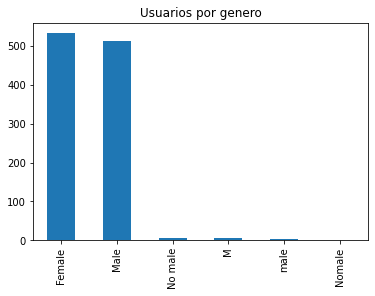

In [149]:
plot = dataframe['Genero'].value_counts().plot(kind='bar',
                                            title='Usuarios por genero')

### se debe tratar la columna genero

### Usuarios por Historial familiar de sobrepeso

In [150]:
dataframe['Historia_familiar_sobrepeso'].value_counts()

yes    865
no     194
Name: Historia_familiar_sobrepeso, dtype: int64

#### Porcentaje de usuarios por Historial familiar de sobrepeso

In [151]:
100* dataframe['Historia_familiar_sobrepeso'].value_counts()/len(dataframe['Historia_familiar_sobrepeso'])

yes    81.680831
no     18.319169
Name: Historia_familiar_sobrepeso, dtype: float64

#### Grafica de usuarios por Historial familiar de sobrepeso

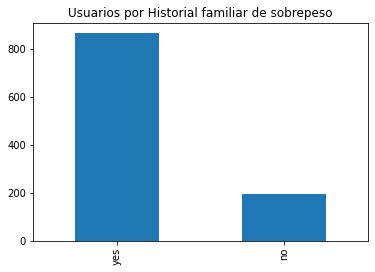

In [152]:
plot = dataframe['Historia_familiar_sobrepeso'].value_counts().plot(kind='bar',
                                            title='Usuarios por Historial familiar de sobrepeso')

### Usuarios por Consume alimentos altamente calóricas con frecuencia

In [153]:
dataframe['FAVC'].value_counts()

yes    947
no     112
Name: FAVC, dtype: int64

#### Porcentaje de usuarios por Consume alimentos altamente calóricas con frecuencia

In [154]:
100* dataframe['FAVC'].value_counts()/len(dataframe['FAVC'])

yes    89.423985
no     10.576015
Name: FAVC, dtype: float64

#### Grafica de usuarios por Consume alimentos altamente calóricas con frecuencia

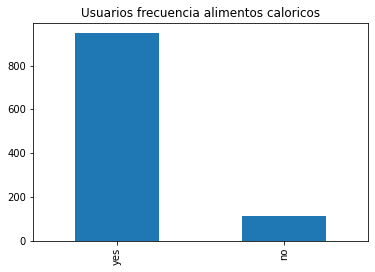

In [155]:
plot = dataframe['FAVC'].value_counts().plot(kind='bar',
                                            title='Usuarios frecuencia alimentos caloricos')

### Usuarios por Consume alimentos entre comidas

In [156]:
dataframe['CAEC'].value_counts()

Sometimes     876
Frequently    115
Always         37
no             31
Name: CAEC, dtype: int64

#### Porcentaje de usuarios por Consume alimentos entre comidas

In [157]:
100* dataframe['CAEC'].value_counts()/len(dataframe['CAEC'])

Sometimes     82.719547
Frequently    10.859301
Always         3.493862
no             2.927290
Name: CAEC, dtype: float64

#### Grafica de usuarios por Consume alimentos entre comidas

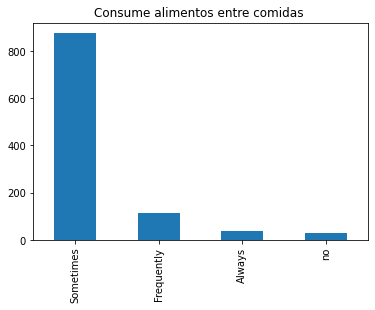

In [158]:
plot = dataframe['CAEC'].value_counts().plot(kind='bar',
                                            title='Consume alimentos entre comidas ')

### Usuarios por Fumador

In [159]:
dataframe['Fumador'].value_counts()

no     1030
yes      19
          3
Name: Fumador, dtype: int64

#### Porcentaje de usuarios por Fumador

In [160]:
100* dataframe['Fumador'].value_counts()/len(dataframe['Fumador'])

no     97.261568
yes     1.794145
        0.283286
Name: Fumador, dtype: float64

#### Grafica de usuarios por Fumador

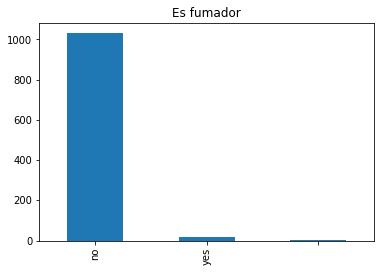

In [161]:
plot = dataframe['Fumador'].value_counts().plot(kind='bar',
                                            title='Es fumador')

### Usuarios por Monitorea la cantidad de calorías que consume diariamente

In [162]:
dataframe['SCC'].value_counts()

no     1017
yes      42
Name: SCC, dtype: int64

#### Porcentaje de usuarios por Monitorea la cantidad de calorías que consume diariamente

In [163]:
100* dataframe['SCC'].value_counts()/len(dataframe['SCC'])

no     96.033994
yes     3.966006
Name: SCC, dtype: float64

#### Grafica de usuarios por Monitorea la cantidad de calorías que consume diariamente

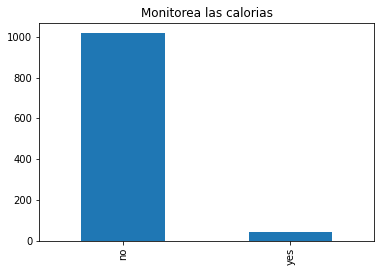

In [164]:
plot = dataframe['SCC'].value_counts().plot(kind='bar',
                                            title='Monitorea las calorias')

### Usuarios por Qué tan a menudo bebe alcohol

In [165]:
dataframe['CALC'].value_counts()

Sometimes     719
no            304
Frequently     36
Name: CALC, dtype: int64

#### Porcentaje de usuarios por Qué tan a menudo bebe alcohol

In [166]:
100* dataframe['CALC'].value_counts()/len(dataframe['CALC'])

Sometimes     67.894240
no            28.706327
Frequently     3.399433
Name: CALC, dtype: float64

#### Grafica de usuarios por Qué tan a menudo bebe alcohol

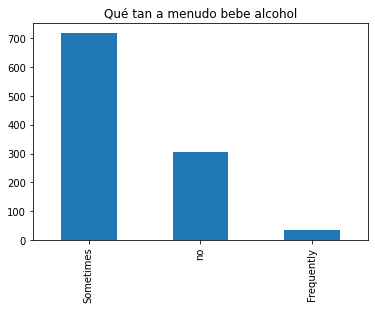

In [167]:
plot = dataframe['CALC'].value_counts().plot(kind='bar',
                                            title='Qué tan a menudo bebe alcohol')

### Usuarios por medio de transporte

In [168]:
dataframe['MTRANS'].value_counts()

Public_Transportation    791
Automobile               222
Walking                   34
Motorbike                  9
Bike                       3
Name: MTRANS, dtype: int64

#### Porcentaje de usuarios por medio de transporte

In [169]:
100* dataframe['MTRANS'].value_counts()/len(dataframe['MTRANS'])

Public_Transportation    74.693107
Automobile               20.963173
Walking                   3.210576
Motorbike                 0.849858
Bike                      0.283286
Name: MTRANS, dtype: float64

#### Grafica de usuarios por medio de transporte

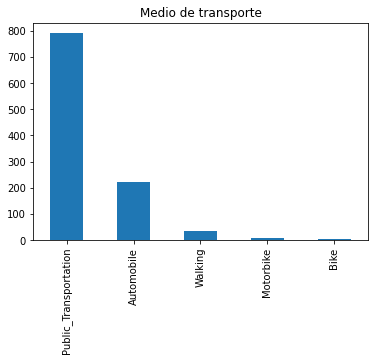

In [170]:
plot = dataframe['MTRANS'].value_counts().plot(kind='bar',
                                            title='Medio de transporte')

### Analisis de los datos y columnas



# Análisis calidad de datos
en este apartado analizaremos la calidad de los datos presentados, para despues poder preparar los datos

## Completitud
procederemos a obtener el porcentaje de datos nulos para cada columna

In [171]:
(dataframe.isnull().sum() / dataframe.shape[0]*100).sort_values(ascending = False)

Fumador                        0.661001
Genero                         0.000000
MTRANS                         0.000000
CALC                           0.000000
TUE                            0.000000
FAF                            0.000000
SCC                            0.000000
CH2O                           0.000000
CAEC                           0.000000
Edad                           0.000000
NCP                            0.000000
FCVC                           0.000000
FAVC                           0.000000
Historia_familiar_sobrepeso    0.000000
Peso                           0.000000
Estatura                       0.000000
Obeso                          0.000000
dtype: float64

En este caso vemos que estos datos no estan todos completos y  debemos completarlos, pero en este caso solo sera necesario para la columna fumador, la cual se podra completar con no

<AxesSubplot:>

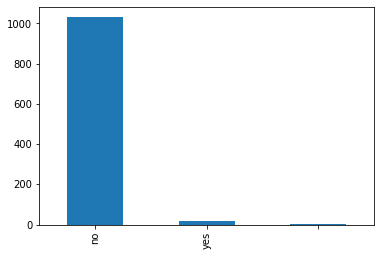

In [172]:
dataframe["Fumador"].value_counts().plot(kind='bar')

## Unicidad
Procederemos a obtener el porcentaje de datos duplicados, en general y segun el id unico de cada dato

In [173]:
100*len(dataframe.loc[dataframe.duplicated()])/len(dataframe)

23.229461756373937

In [174]:
dataframe.loc[dataframe.duplicated()]

,Genero,Edad,Estatura,Peso,Historia_familiar_sobrepeso,FAVC,FCVC,NCP,CAEC,Fumador,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obeso
21,Male,18,1.79,52,no,no,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Insufficient_Weight
27,Female,19.483.036,153.777,42,no,yes,3,1,Frequently,no,1.387.531,no,0,0.466169,Sometimes,Public_Transportation,Insufficient_Weight
34,Male,2.181.119,171.266,51.598.593,yes,yes,3,3.156.153,Frequently,no,1.253.803,no,0.544784,0.256382,no,Public_Transportation,Insufficient_Weight
40,Female,21,1.52,42,no,yes,3,1,Frequently,no,1,no,0,0,Sometimes,Public_Transportation,Insufficient_Weight
51,Male,18,1.85,60,yes,yes,3,4,Sometimes,no,2,yes,2,0,Sometimes,Automobile,Insufficient_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,Female,21.572.114,1.751.067,133.845.064,yes,yes,3,3,Sometimes,no,2.748.569,no,1.427.037,0.902825,Sometimes,Public_Transportation,Obesity_Type_III
1051,Female,2.167.447,171.978,132.262.558,yes,yes,3,3,Sometimes,no,1.777.805,no,1.584.716,0.927341,Sometimes,Public_Transportation,Obesity_Type_III
1055,Female,26,1.639.524,111.945.588,yes,yes,3,3,Sometimes,no,2.739.351,no,0,0.064769,Sometimes,Public_Transportation,Obesity_Type_III
1057,Female,26,1.659.557,111.999.096,yes,yes,3,3,Sometimes,no,2.956.548,no,0,0.010056,Sometimes,Public_Transportation,Obesity_Type_III


En este caso tenemos registros duplicados, en su totalidad, por lo cual se deben eliminar.

## Consistencia
obtendremos los datos y sus tipos y realizaremos un analisis para cada caso, teniendo en cuenta que verificaremos los datos categoricos

In [175]:
dataframe.dtypes

Genero                         object
Edad                           object
Estatura                       object
Peso                           object
Historia_familiar_sobrepeso    object
FAVC                           object
FCVC                           object
NCP                            object
CAEC                           object
Fumador                        object
CH2O                           object
SCC                            object
FAF                            object
TUE                            object
CALC                           object
MTRANS                         object
Obeso                          object
dtype: object

### Datos categoricos

#### Genero

In [176]:
dataframe['Genero'].value_counts()

Female     532
Male       512
No male      5
M            5
male         4
Nomale       1
Name: Genero, dtype: int64

En este caso observamos que los datos no se encuentran dentro de los valores ordinarios y  es necesario tomar medidas o cambiar los datos, en este caso justar las categorias a male y female

#### Edad

In [177]:
dataframe['Edad'].value_counts()

18            77
26            63
23            47
21            39
19            36
              ..
39.170.029     1
20.492.077     1
19.795.269     1
31.398.281     1
25.976.209     1
Name: Edad, Length: 536, dtype: int64

En este caso observamos que los datos no se encuentran dentro de los valores ordinarios y  es necesario tomar medidas o cambiar los datos, en este caso se deben convertir estos datos a numericos, ya que son una representacion númerica

#### Estatura

In [178]:
dataframe['Estatura'].value_counts()

1.7          36
1.65         28
1.75         21
1.6          20
1.62         17
             ..
1.529.223     1
1.758.972     1
1.919.543     1
1.744.733     1
1.624.134     1
Name: Estatura, Length: 626, dtype: int64

En este caso observamos que los datos no se encuentran dentro de los valores ordinarios y  es necesario tomar medidas o cambiar los datos, en este caso se deben convertir estos datos a numericos, ya que son una representacion númerica

#### Peso

In [179]:
dataframe['Peso'].value_counts()

80             28
70             28
50             21
60             19
75             19
               ..
109.411.622     1
97.911.865      1
7.700.103       1
11.477.484      1
111.531.208     1
Name: Peso, Length: 615, dtype: int64

En este caso observamos que los datos no se encuentran dentro de los valores ordinarios y  es necesario tomar medidas o cambiar los datos, en este caso se deben convertir estos datos a numericos, ya que son una representacion númerica

#### Historia_familiar_sobrepeso

In [180]:
dataframe['Historia_familiar_sobrepeso'].value_counts()

yes    865
no     194
Name: Historia_familiar_sobrepeso, dtype: int64

En este caso observamos que los datos se encuentran dentro de los valores ordinarios y no es necesario tomar medidas o cambiar los datos

#### FAVC

In [181]:
dataframe['FAVC'].value_counts()

yes    947
no     112
Name: FAVC, dtype: int64

En este caso observamos que los datos se encuentran dentro de los valores ordinarios y no es necesario tomar medidas o cambiar los datos

#### FCVC

In [182]:
dataframe['FCVC'].value_counts()

3            353
2            295
1             12
2.029.634      5
2.442.536      4
            ... 
2.067.817      1
2.598.051      1
2.332.074      1
2.003.951      1
249.619        1
Name: FCVC, Length: 304, dtype: int64

En este caso observamos que los datos no se encuentran dentro de los valores ordinarios y  es necesario tomar medidas o cambiar los datos, en este caso se deben convertir estos datos a numericos, ya que son una representacion númerica

#### NCP

In [183]:
dataframe['NCP'].value_counts()

3            614
1            103
4             31
1.894.384      4
2.987.652      4
            ... 
2.752.318      1
2.337.035      1
259.257        1
2.646.717      1
2.711.238      1
Name: NCP, Length: 243, dtype: int64

En este caso observamos que los datos no se encuentran dentro de los valores ordinarios y  es necesario tomar medidas o cambiar los datos, en este caso se deben convertir estos datos a numericos, ya que son una representacion númerica

#### CAEC

In [184]:
dataframe['CAEC'].value_counts()

Sometimes     876
Frequently    115
Always         37
no             31
Name: CAEC, dtype: int64

En este caso observamos que los datos se encuentran dentro de los valores ordinarios y no es necesario tomar medidas o cambiar los datos

#### Fumador

In [185]:
dataframe['Fumador'].value_counts()

no     1030
yes      19
          3
Name: Fumador, dtype: int64

Es posible observar que los datos estan dentro de los parametros y no hay ningun dato atipico

#### CH2O

In [186]:
dataframe['CH2O'].value_counts()

2            226
1             92
3             84
1.656.082      5
1.827.515      5
            ... 
2.976.229      1
1.606.076      1
1.302.594      1
2.653.831      1
2.609.188      1
Name: CH2O, Length: 499, dtype: int64

En este caso observamos que los datos no se encuentran dentro de los valores ordinarios y  es necesario tomar medidas o cambiar los datos, en este caso se deben convertir estos datos a numericos, ya que son una representacion númerica

#### SCC

In [187]:
dataframe['SCC'].value_counts()

no     1017
yes      42
Name: SCC, dtype: int64

Es posible observar que los datos estan dentro de los parametros y no hay ningun dato atipico

####FAF

In [188]:
dataframe['FAF'].value_counts()

0            244
1            132
2             73
3             43
0.480206       5
            ... 
1.030.752      1
2.892.922      1
1.524.405      1
0.451009       1
0.083675       1
Name: FAF, Length: 440, dtype: int64

En este caso observamos que los datos no se encuentran dentro de los valores ordinarios y  es necesario tomar medidas o cambiar los datos, en este caso se deben convertir estos datos a numericos, ya que son una representacion númerica

#### TUE

In [189]:
dataframe['TUE'].value_counts()

0            282
1            147
2             48
0.343635       4
1.444.033      4
            ... 
1.506.576      1
0.121992       1
1.749.586      1
1.103.349      1
0.17403        1
Name: TUE, Length: 443, dtype: int64

En este caso observamos que los datos no se encuentran dentro de los valores ordinarios y  es necesario tomar medidas o cambiar los datos, en este caso se deben convertir estos datos a numericos, ya que son una representacion númerica

#### CALC

In [190]:
dataframe['CALC'].value_counts()

Sometimes     719
no            304
Frequently     36
Name: CALC, dtype: int64

Es posible observar que los datos estan dentro de los parametros y no hay ningun dato atipico

#### MTRANS

In [191]:
dataframe['MTRANS'].value_counts()

Public_Transportation    791
Automobile               222
Walking                   34
Motorbike                  9
Bike                       3
Name: MTRANS, dtype: int64

Es posible observar que los datos estan dentro de los parametros y no hay ningun dato atipico

#### Obeso

In [192]:
dataframe['Obeso'].value_counts()

Obesity_Type_I         175
Obesity_Type_III       165
Obesity_Type_II        148
Overweight_Level_II    146
Overweight_Level_I     145
Normal_Weight          143
Insufficient_Weight    137
Name: Obeso, dtype: int64

Es posible observar que los datos estan dentro de los parametros y no hay ningun dato atipico

#### se deben tratar los datos: 

## Validez
vamos a verificar los typos de datos y se trabajaran sobre los datos numericos, ya que ya se verifico la consistnecia de los datos categoricos

### Datos numericos

In [193]:
dataframe.describe()

,Genero,Edad,Estatura,Peso,Historia_familiar_sobrepeso,FAVC,FCVC,NCP,CAEC,Fumador,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obeso
count,1059,1059,1059,1059,1059,1059,1059,1059,1059,1052,1059,1059,1059,1059,1059,1059,1059
unique,6,536,626,615,2,2,304,243,4,3,499,2,440,443,3,5,7
top,Female,18,1.7,80,yes,yes,3,3,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,532,77,36,28,865,947,353,614,876,1030,226,1017,244,282,719,791,175


#### vemos que en esta ocasion todos los datos son categoricos por lo cual no se puede hacer este análisis

# Preparacion de datos
Primero se analizaran y se trataran los datos identificados en el apartado de calidad de datos

In [194]:
dataframeM = dataframe.drop_duplicates()

Eliminamos los datos duplicados

In [195]:
dataframeM.shape

(813, 17)

In [196]:
dataframeM.sample(12)

,Genero,Edad,Estatura,Peso,Historia_familiar_sobrepeso,FAVC,FCVC,NCP,CAEC,Fumador,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obeso
926,Female,20.102.241,1.816.868,153.959.945,yes,yes,3,3,Sometimes,no,2.414.739,no,1.917.014,0.927982,Sometimes,Public_Transportation,Obesity_Type_III
223,Male,23,1.68,60,no,no,2,4,Frequently,no,2,no,0,0,no,Walking,Normal_Weight
755,Male,40.174.191,1.763.029,116.974.504,yes,yes,2.046.651,2.842.035,Sometimes,no,1.732.072,no,0.584272,0,Sometimes,Automobile,Obesity_Type_II
707,Female,19.442.663,1.627.812,82,yes,yes,1.081.585,2.870.661,Sometimes,no,111.756,no,0,1.616.826,Sometimes,Public_Transportation,Obesity_Type_I
399,Female,17.781.183,1.6,65,yes,yes,3,2.973.504,Sometimes,no,2,yes,0.178976,0.166076,Sometimes,Public_Transportation,Overweight_Level_I
5,Female,21.376.426,1.722.527,50.833.029,no,no,3,3.285.167,Frequently,no,1.569.082,no,0.545931,0.469735,Sometimes,Public_Transportation,Insufficient_Weight
761,Male,25.136.116,176.414,113.089.716,yes,yes,1.168.856,3,Sometimes,no,2.013.205,no,1.246.223,0.00159,Sometimes,Public_Transportation,Obesity_Type_II
924,Female,25.930.376,1.610.086,10.238.745,yes,yes,3,3,Sometimes,NaN,1.050.564,no,0.026033,0.539074,Sometimes,Public_Transportation,Obesity_Type_III
315,Female,21.009.437,160.681,67.773.914,yes,yes,2,3.156.309,no,no,3,no,1.179.592,0.086868,Sometimes,Public_Transportation,Overweight_Level_I
776,Male,21.556.361,1.773.664,116.160.329,yes,yes,2,3,Sometimes,no,2,no,1.399.183,1,Sometimes,Public_Transportation,Obesity_Type_II


Llenaremos los datos vacios

In [197]:
dataframeM.loc[dataframeM.Fumador.isna(), 'Fumador']= "no"

<ipython-input-197-2403c98c72f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeM.loc[dataframeM.Fumador.isna(), 'Fumador']= "no"


In [198]:
dataframeM.loc[dataframeM.Fumador.str.contains(" "), 'Fumador']= "no"

<ipython-input-198-b5ed43ff1807>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeM.loc[dataframeM.Fumador.str.contains(" "), 'Fumador']= "no"


<AxesSubplot:>

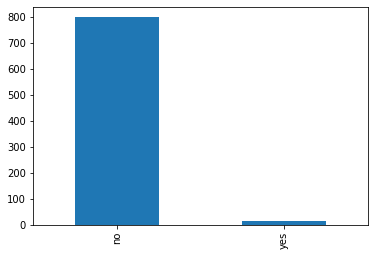

In [199]:
dataframeM["Fumador"].value_counts().plot(kind='bar')

In [200]:
(dataframeM.isnull().sum() / dataframeM.shape[0]*100).sort_values(ascending = False)

Genero                         0.0
Fumador                        0.0
MTRANS                         0.0
CALC                           0.0
TUE                            0.0
FAF                            0.0
SCC                            0.0
CH2O                           0.0
CAEC                           0.0
Edad                           0.0
NCP                            0.0
FCVC                           0.0
FAVC                           0.0
Historia_familiar_sobrepeso    0.0
Peso                           0.0
Estatura                       0.0
Obeso                          0.0
dtype: float64

trabajaremos la columna genero

<AxesSubplot:>

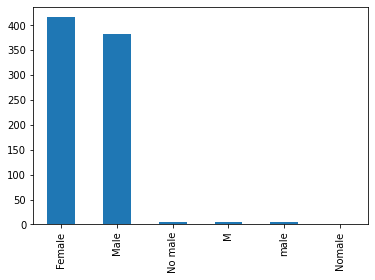

In [201]:
dataframeM["Genero"].value_counts().plot(kind='bar')

<ipython-input-202-5e9c34bd8ea1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeM.loc[dataframeM.Genero == "M", 'Genero']= "Male"
<ipython-input-202-5e9c34bd8ea1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeM.loc[dataframeM.Genero == "male", 'Genero']= "Male"
<ipython-input-202-5e9c34bd8ea1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeM.loc[dataframeM.Genero == "No male", 'Genero']= "Female"
<ipyt

<AxesSubplot:>

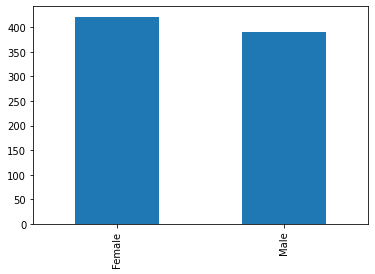

In [202]:
dataframeM.loc[dataframeM.Genero == "M", 'Genero']= "Male"
dataframeM.loc[dataframeM.Genero == "male", 'Genero']= "Male"
dataframeM.loc[dataframeM.Genero == "No male", 'Genero']= "Female"
dataframeM.loc[dataframeM.Genero == "Nomale", 'Genero']= "Female"
dataframeM["Genero"].value_counts().plot(kind='bar')

# En este punto se trataran mejor los datos, cosa que no se hizo en la etapa 1, como es estandarizar y normalizar

## Edad

In [203]:
for i in  dataframeM['Edad']:
  h=str(i)
  cad= h.split(".")[0]
  val = int(cad)
  dataframeM.loc[dataframeM.Edad == i, 'Edad']= val

dataframeM['Edad'] = dataframeM['Edad'].astype('int64')
for i in  dataframeM['Edad']:
  val=i
  if i>=100.0 and i<1000.0:
    val= i/10
  dataframeM.loc[dataframeM.Edad == i, 'Edad']= val
  

<ipython-input-203-6d8673a325df>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeM.loc[dataframeM.Edad == i, 'Edad']= val
<ipython-input-203-6d8673a325df>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeM['Edad'] = dataframeM['Edad'].astype('int64')
<ipython-input-203-6d8673a325df>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

## Estatura

In [204]:
for i in  dataframeM['Estatura']:
  h=(str(i)).split(".")
  cad= h[0] + "."+h[1]
  val = float(cad)
  dataframeM.loc[dataframeM.Estatura == i, 'Estatura']= val

dataframeM['Estatura'] = dataframeM['Estatura'].astype('float64')

for i in  dataframeM['Estatura']:
  val=i
  if i>=10.0 and i<100.0:
    val= i/10
  elif i>=100:
    val= i/100
  dataframeM.loc[dataframeM.Estatura == i, 'Estatura']= val

<ipython-input-204-aa0a5e182f54>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeM['Estatura'] = dataframeM['Estatura'].astype('float64')


Peso

In [205]:
for i in  dataframeM['Peso']:
  h=str(i)
  cad= h.split(".")
  val = int(cad[0])
  dataframeM.loc[dataframeM.Peso == i, 'Peso']= val
 

In [206]:
dataframeM.drop(dataframeM[dataframeM['Peso'] > 200].index, inplace = True)
dataframeM['Peso'] = dataframeM['Peso'].astype('int64')

<ipython-input-206-403c3c182e03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeM.drop(dataframeM[dataframeM['Peso'] > 200].index, inplace = True)
<ipython-input-206-403c3c182e03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeM['Peso'] = dataframeM['Peso'].astype('int64')


In [207]:
dataframeM.describe()

,Edad,Estatura,Peso
count,809.000000,809.000000,809.000000
mean,22.788010,1.695283,79.521632
std,7.725733,0.095748,31.563543
min,1.000000,1.153000,1.000000
25%,19.000000,1.630000,60.000000
50%,22.000000,1.700000,80.000000
75%,26.000000,1.760000,104.000000
max,61.000000,1.975000,155.000000


### A continuacion trataremos la columna FCVC



In [208]:
for i in  dataframeM['FCVC']:
  h=str(i)
  cad= h.split(".")[0]
  val = int(cad)
  dataframeM.loc[dataframeM.FCVC == i, 'FCVC']= val

dataframeM['FCVC'] = dataframeM['FCVC'].astype('int64')
for i in  dataframeM['FCVC']:
  val=i
  if i>=10.0 and i<100.0:
    val= i/10
  elif i>=100:
    val= i/100
  dataframeM.loc[dataframeM.FCVC == i, 'FCVC']= val

<ipython-input-208-2a88aa5e5b4f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeM['FCVC'] = dataframeM['FCVC'].astype('int64')
<ipython-input-208-2a88aa5e5b4f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeM.loc[dataframeM.FCVC == i, 'FCVC']= val


NCP

In [209]:
for i in  dataframeM['NCP']:
  h=str(i)
  cad= h.split(".")[0]
  val = int(cad)
  dataframeM.loc[dataframeM.NCP == i, 'NCP']= val

dataframeM['NCP'] = dataframeM['NCP'].astype('int64')

for i in  dataframeM['NCP']:
  val=i
  if i>=10.0 and i<100.0:
    val= i/10
  elif i>=100:
    val= i/100
  dataframeM.loc[dataframeM.NCP == i, 'NCP']= val


<ipython-input-209-a02ebe3bc2f5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeM['NCP'] = dataframeM['NCP'].astype('int64')
<ipython-input-209-a02ebe3bc2f5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeM.loc[dataframeM.NCP == i, 'NCP']= val


### A continuacion trataremos la columna CH2O

In [210]:
for i in  dataframeM['CH2O']:
  h=str(i)
  cad= h.split(".")[0]
  val = int(cad)
  dataframeM.loc[dataframeM.CH2O == i, 'CH2O']= val

dataframeM['CH2O'] = dataframeM['CH2O'].astype('int64')
for i in  dataframeM['CH2O']:
  val=i
  if i>=10.0 and i<100.0:
    val= i/10
  elif i>=100:
    val= i/100
  dataframeM.loc[dataframeM.CH2O == i, 'CH2O']= val

<ipython-input-210-a1ee7646de1b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeM['CH2O'] = dataframeM['CH2O'].astype('int64')
<ipython-input-210-a1ee7646de1b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeM.loc[dataframeM.CH2O == i, 'CH2O']= val


### A continuacion trataremos la columna FAF

In [211]:
for i in  dataframeM['FAF']:
  h=str(i)
  cad= h.split(".")[0]
  val = int(cad)
  dataframeM.loc[dataframeM.FAF == i, 'FAF']= val

dataframeM['FAF'] = dataframeM['FAF'].astype('int64')
for i in  dataframeM['FAF']:
  val=i
  if i>=10.0 and i<100.0:
    val= i/10
  elif i>=100:
    val= i/100
  dataframeM.loc[dataframeM.FAF == i, 'FAF']= val

<ipython-input-211-9fa55542f131>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeM['FAF'] = dataframeM['FAF'].astype('int64')
<ipython-input-211-9fa55542f131>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeM.loc[dataframeM.FAF == i, 'FAF']= val


### A continuacion trataremos la columna TUE

In [212]:
for i in  dataframeM['TUE']:
  h=str(i)
  cad= h.split(".")[0]
  val = int(cad)
  dataframeM.loc[dataframeM.TUE == i, 'TUE']= val

dataframeM['TUE'] = dataframeM['TUE'].astype('int64')
for i in  dataframeM['TUE']:
  val=i
  if i>=10.0 and i<100.0:
    val= i/10
  elif i>=100:
    val= i/100
  dataframeM.loc[dataframeM.TUE == i, 'TUE']= val

<ipython-input-212-dcddcbebd76e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeM['TUE'] = dataframeM['TUE'].astype('int64')
<ipython-input-212-dcddcbebd76e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeM.loc[dataframeM.TUE == i, 'TUE']= val


In [213]:
dataframeM.describe()

,Edad,Estatura,Peso,FCVC,NCP,CH2O,FAF,TUE
count,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000
mean,22.788010,1.695283,79.521632,2.270507,2.525884,1.724771,0.739110,0.361904
std,7.725733,0.095748,31.563543,0.605072,0.822908,0.592786,0.859589,0.572955
min,1.000000,1.153000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.000000,1.630000,60.000000,2.000000,2.000000,1.000000,0.000000,0.000000
50%,22.000000,1.700000,80.000000,2.000000,3.000000,2.000000,1.000000,0.000000
75%,26.000000,1.760000,104.000000,3.000000,3.000000,2.000000,1.000000,1.000000
max,61.000000,1.975000,155.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### en este punto ya convertimos las columnas a tratar y se verificaran los cambios

In [214]:
dataframeM.dtypes

Genero                          object
Edad                           float64
Estatura                       float64
Peso                             int64
Historia_familiar_sobrepeso     object
FAVC                            object
FCVC                           float64
NCP                            float64
CAEC                            object
Fumador                         object
CH2O                           float64
SCC                             object
FAF                            float64
TUE                            float64
CALC                            object
MTRANS                          object
Obeso                           object
dtype: object

In [215]:
dataframeM['Peso'].describe()

count    809.000000
mean      79.521632
std       31.563543
min        1.000000
25%       60.000000
50%       80.000000
75%      104.000000
max      155.000000
Name: Peso, dtype: float64

In [216]:
dataframeM.value_counts()

Genero  Edad  Estatura  Peso  Historia_familiar_sobrepeso  FAVC  FCVC  NCP  CAEC        Fumador  CH2O  SCC  FAF  TUE  CALC       MTRANS                 Obeso              
Female  26.0  1.64100   111   yes                          yes   3.0   3.0  Sometimes   no       2.0   no   0.0  0.0  Sometimes  Public_Transportation  Obesity_Type_III       3
        25.0  1.61000   10    yes                          yes   3.0   3.0  Sometimes   no       1.0   no   0.0  0.0  Sometimes  Public_Transportation  Obesity_Type_III       2
        19.0  1.53777   42    no                           yes   3.0   1.0  Frequently  no       1.0   no   0.0  0.0  Sometimes  Public_Transportation  Insufficient_Weight    2
        17.0  1.56000   51    no                           yes   3.0   3.0  Sometimes   no       1.0   no   0.0  2.0  no         Public_Transportation  Normal_Weight          2
        18.0  1.74500   133   yes                          yes   3.0   3.0  Sometimes   no       2.0   no   1.0  0.0  So

#### como vemos los cambios y la preparacion para los datos catalogados han sido exitosos han sido exitosos

## Para implementar el modelo de regresion se necesitan tener todos los datos númericos, razon por la cual se trataran algunos datos antes de avanzar a la fase de entendimiento

Columnas categoricas

In [217]:
X= dataframeM
le = LabelEncoder()
X.head(30)

,Genero,Edad,Estatura,Peso,Historia_familiar_sobrepeso,FAVC,FCVC,NCP,CAEC,Fumador,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obeso
0,Female,1.0,1.56600,41,no,yes,2.00,1.00,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
1,Female,22.0,1.59559,44,no,no,2.00,1.10,Frequently,no,1.0,no,0.0,0.0,no,Public_Transportation,Insufficient_Weight
2,Male,20.0,1.75900,55,yes,yes,2.00,3.00,Sometimes,no,2.0,no,2.0,1.0,no,Public_Transportation,Insufficient_Weight
3,Male,18.0,1.71889,52,yes,yes,1.00,3.00,Sometimes,no,1.0,no,0.0,1.0,Sometimes,Public_Transportation,Insufficient_Weight
4,Male,18.0,1.72000,53,yes,yes,2.00,3.00,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight
5,Female,21.0,1.72200,50,no,no,3.00,3.00,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
6,Female,18.0,1.58900,40,no,yes,2.00,1.00,Sometimes,no,1.0,no,0.0,1.0,Sometimes,Public_Transportation,Insufficient_Weight
7,Female,20.0,1.53400,4,no,yes,2.88,1.00,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
8,Female,21.0,1.57206,43,no,no,3.00,1.00,Frequently,no,2.0,no,0.0,0.0,no,Public_Transportation,Insufficient_Weight
9,Female,19.0,1.52000,42,no,yes,3.00,1.00,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight


In [218]:
X.shape

(809, 17)

# En este punto tenemos en cuenta los distintos tipos de sobrepeso, es donde nuestra variable objetivo, ya no se centra en obesidad II, si no en los tres tipos de obesidad

In [219]:
X.loc[X.Obeso == 'Obesity_Type_I', 'Obeso']= '1'
X.loc[X.Obeso == 'Obesity_Type_II', 'Obeso']= '1'
X.loc[X.Obeso == 'Obesity_Type_III', 'Obeso']= '1'
X.loc[X.Obeso != '1', 'Obeso']= 0

In [220]:
X['Obeso'] = X['Obeso'].astype('int64')

<ipython-input-220-5f7714216230>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Obeso'] = X['Obeso'].astype('int64')


In [221]:
colum= (dataframeM.select_dtypes(include='object')).columns
colum

Index(['Genero', 'Historia_familiar_sobrepeso', 'FAVC', 'CAEC', 'Fumador',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

In [222]:
for element in colum:
  X[element] = le.fit_transform(X[element])


<ipython-input-222-60706bef7ac0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[element] = le.fit_transform(X[element])
<ipython-input-222-60706bef7ac0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[element] = le.fit_transform(X[element])
<ipython-input-222-60706bef7ac0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [223]:
X.head(20)

,Genero,Edad,Estatura,Peso,Historia_familiar_sobrepeso,FAVC,FCVC,NCP,CAEC,Fumador,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obeso
0,0,1.0,1.56600,41,0,1,2.00,1.00,1,0,1.0,0,0.0,0.0,1,3,0
1,0,22.0,1.59559,44,0,0,2.00,1.10,1,0,1.0,0,0.0,0.0,2,3,0
2,1,20.0,1.75900,55,1,1,2.00,3.00,2,0,2.0,0,2.0,1.0,2,3,0
3,1,18.0,1.71889,52,1,1,1.00,3.00,2,0,1.0,0,0.0,1.0,1,3,0
4,1,18.0,1.72000,53,1,1,2.00,3.00,2,0,2.0,0,0.0,2.0,1,3,0
5,0,21.0,1.72200,50,0,0,3.00,3.00,1,0,1.0,0,0.0,0.0,1,3,0
6,0,18.0,1.58900,40,0,1,2.00,1.00,2,0,1.0,0,0.0,1.0,1,3,0
7,0,20.0,1.53400,4,0,1,2.88,1.00,1,0,1.0,0,0.0,0.0,1,3,0
8,0,21.0,1.57206,43,0,0,3.00,1.00,1,0,2.0,0,0.0,0.0,2,3,0
9,0,19.0,1.52000,42,0,1,3.00,1.00,1,0,1.0,0,0.0,0.0,1,3,0


In [224]:
X.shape

(809, 17)

En este punto ya se prepararon todos los datos, ya se encuentran todos los datos como numericos y se puede trabajar con todos estos datos con el fin de obtener un modelo de arbol de decision.

# Modelo

In [225]:
X.dtypes

Genero                           int64
Edad                           float64
Estatura                       float64
Peso                             int64
Historia_familiar_sobrepeso      int64
FAVC                             int64
FCVC                           float64
NCP                            float64
CAEC                             int64
Fumador                          int64
CH2O                           float64
SCC                              int64
FAF                            float64
TUE                            float64
CALC                             int64
MTRANS                           int64
Obeso                            int64
dtype: object

In [226]:
X['Obeso'].value_counts()

0    433
1    376
Name: Obeso, dtype: int64

In [227]:
y= X['Obeso']
x = X.drop(['Obeso'], axis=1)

Shape of X before SMOTE: (809, 16)
shape of X after SMOTE: (866, 16)

Balance of positive and negative classes (%):


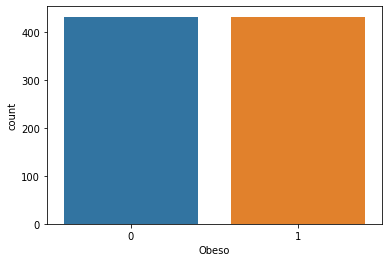

In [228]:
sm = SMOTE(random_state=0)

X_sm, Y_sm = sm.fit_resample(x,y)

print(f'''Shape of X before SMOTE: {x.shape}
shape of X after SMOTE: {X_sm.shape}''')
print("\nBalance of positive and negative classes (%):")
Y_sm.value_counts(normalize=True)*100

ax = sns.countplot(x='Obeso', data=pd.DataFrame(Y_sm, columns=['Obeso']))

In [229]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [230]:
arbol = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [231]:
arbol = arbol.fit(X_train,Y_train)

In [232]:
y_pred = arbol.predict(X_test)

In [233]:
confusion_matrix(Y_test, y_pred)

array([[79,  1],
       [ 3, 79]])

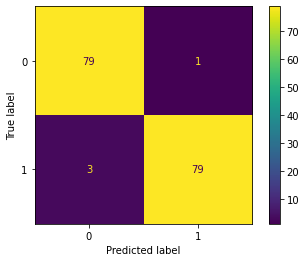

In [234]:
ConfusionMatrixDisplay.from_estimator(arbol, X_test, Y_test)  
plt.show()

In [235]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98        80
           1       0.99      0.96      0.98        82

    accuracy                           0.98       162
   macro avg       0.98      0.98      0.98       162
weighted avg       0.98      0.98      0.98       162



In [236]:
importancia= arbol.feature_importances_
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,Peso,0.769407
1,Estatura,0.212813
2,FCVC,0.009330
3,Edad,0.008450
4,Genero,0.000000
5,Historia_familiar_sobrepeso,0.000000
6,FAVC,0.000000
7,NCP,0.000000
8,CAEC,0.000000
9,Fumador,0.000000


In [237]:
particiones = KFold(n_splits=9, shuffle=True, random_state = 0)

In [238]:
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[4,6,8,10,20],'min_samples_split':[2, 3, 4, 5]}

In [239]:
arbol = DecisionTreeClassifier(random_state=0)

In [240]:
# Utilizar GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)

# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=9, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20],
                         'min_samples_split': [2, 3, 4, 5]})

In [241]:
GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20],
                         'min_samples_split': [2, 3, 4, 5]})

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20],
                         'min_samples_split': [2, 3, 4, 5]})

In [242]:
mejor_modelo.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 2}

In [243]:
arbol_final = mejor_modelo.best_estimator_

In [244]:
y_pred_train = arbol_final.predict(X_train)
y_pred_test = arbol_final.predict(X_test)

In [245]:
confusion_matrix(Y_test, y_pred_test)

array([[79,  1],
       [ 3, 79]])

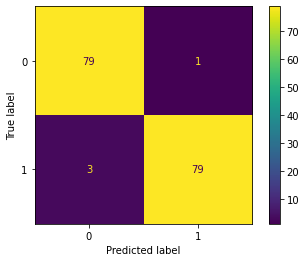

In [246]:
ConfusionMatrixDisplay.from_estimator(arbol_final, X_test, Y_test)  
plt.show()

In [247]:
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))


Exactitud sobre entrenamiento: 1.00
Exactitud sobre test: 0.98


In [248]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98        80
           1       0.99      0.96      0.98        82

    accuracy                           0.98       162
   macro avg       0.98      0.98      0.98       162
weighted avg       0.98      0.98      0.98       162



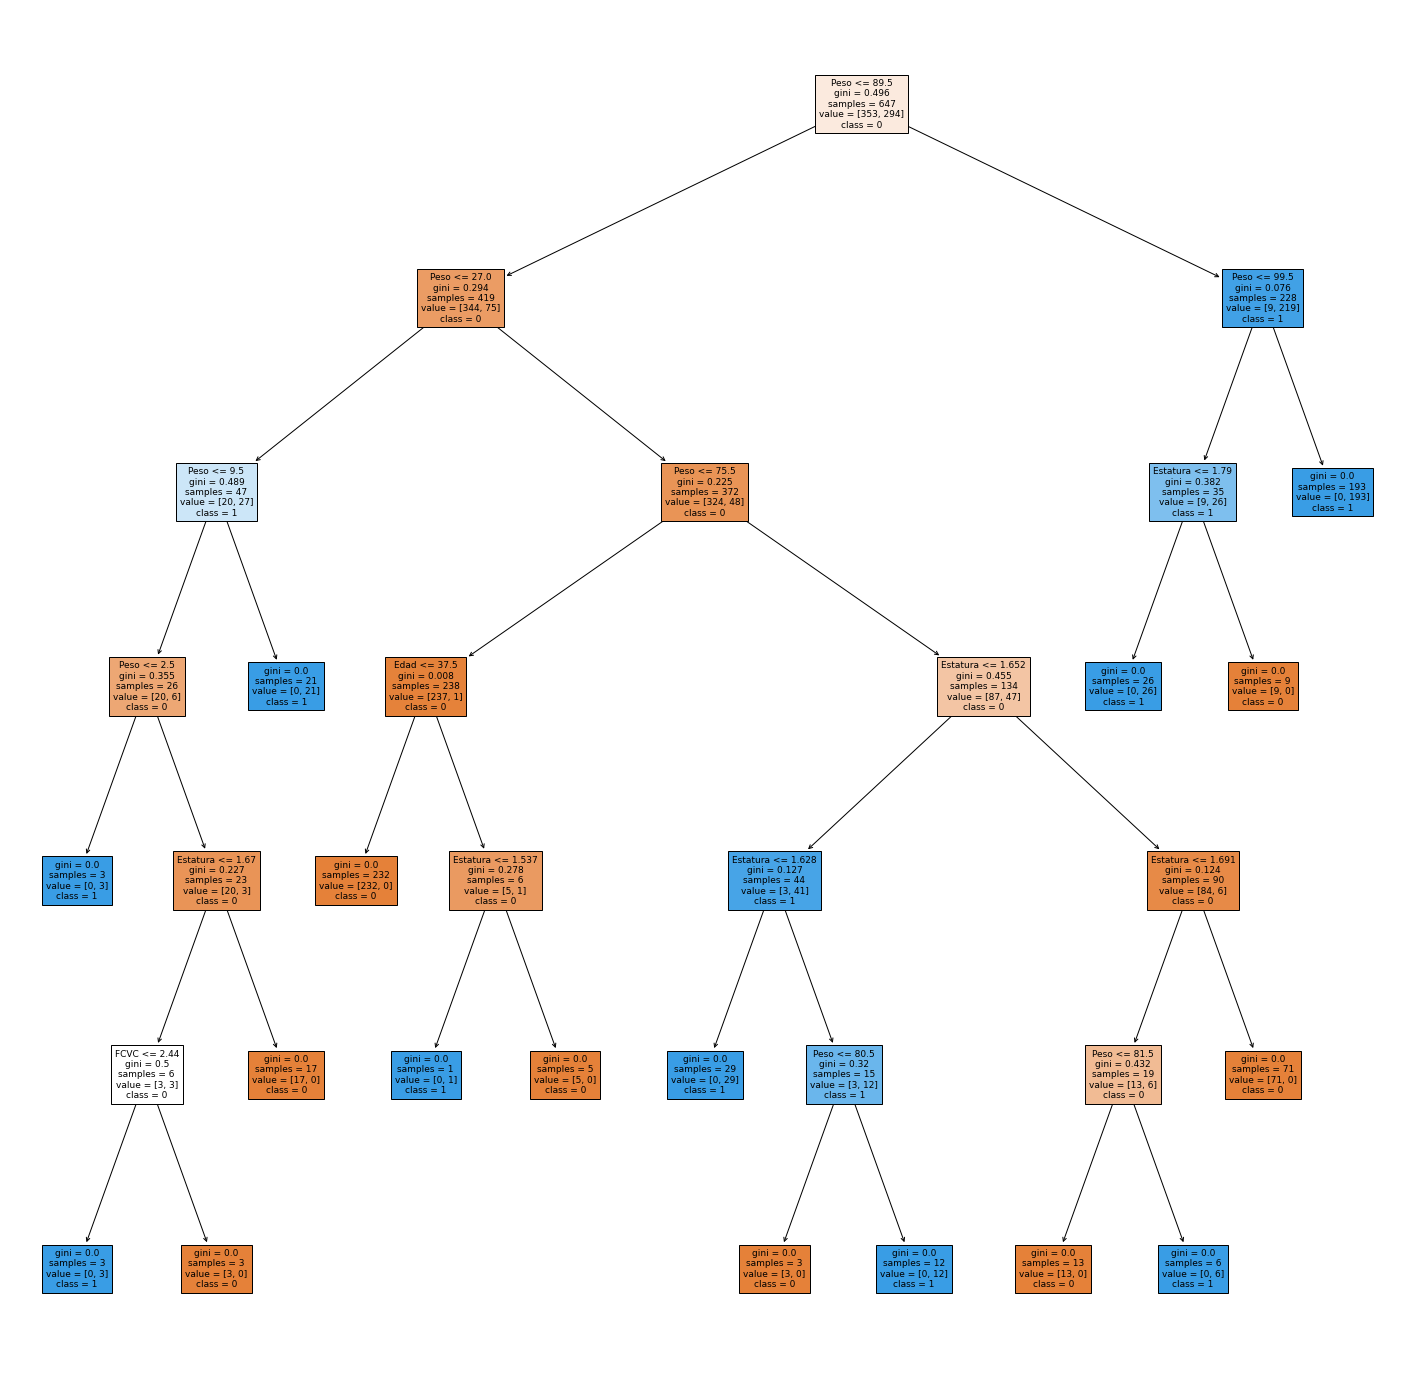

In [249]:
fig = plt.figure(figsize=(25,25))
_ = tree.plot_tree(arbol_final, max_depth=6, feature_names=x.columns, class_names=["0", "1"], filled=True, fontsize=9) 

Resultados

etapa 1:
Podemos ver, que en este caso el sobrepeso, o la obesidad, está recon peso y estatura, pero el genero juega un papel decisivo y muy importante en estos, por tal motivo salud alpes esta en lo correcto y se ve como el genero influencia en las tendencias de peso, en esta caso vemos que las personas que sufren mas sobre peso son los hombres mas altos de 1.75.

etapa 2:
En esta etapa, al incluir mas datos a nuestra variable objetivo, que es obesidad de cualquier tipo, nos encontramos con dos cosas, la primera, es que la calidad de la informacion es mucho mejor, pues la exactitud, el recall, y el f1-score estan muy altos, lo cual nos indica que el modelo funciona bien, pues estos datos, sirven principalmente para eso, pero en este caso, las variables nos cambian, nos indican que lo principal para tener o no obesidad es el peso, pues un peso alto, establece un gran chance de obesidad, y el segundo factor es la estatura, donde un peso alto y una estatura baja nos pueden generar obesidad, en este caso un peso mayor a 60.5 y una estatura menor a 1.79 nos indica que la persona puede llegar o sufre de obesidad, mas sin embargo existen otros criterios como lo son la edad y cantidad de agua que pueden afectar en menor medida a que una persona sufra de obesidad.